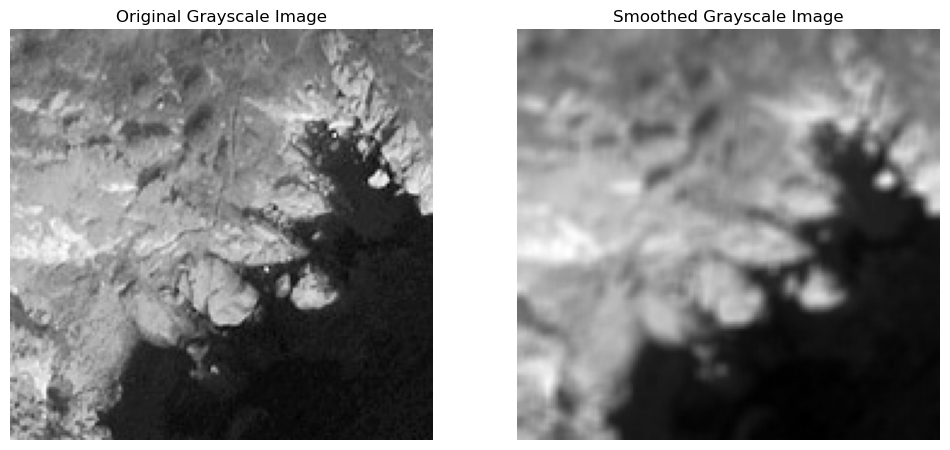

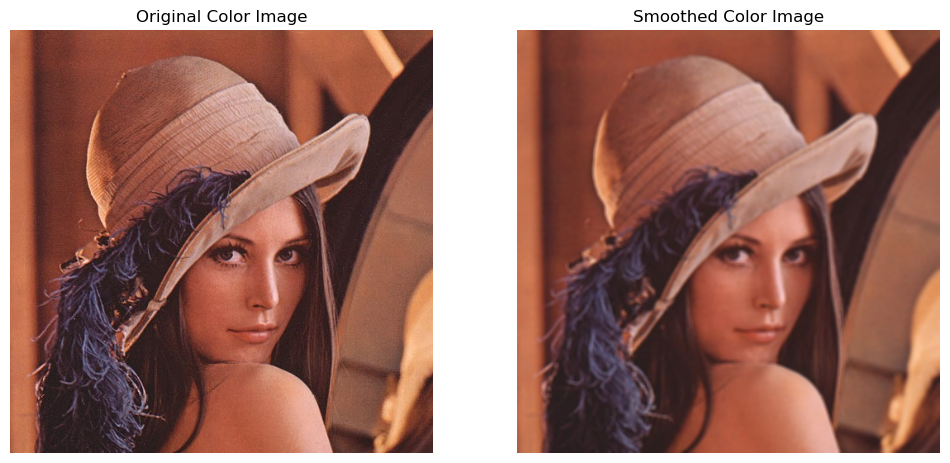

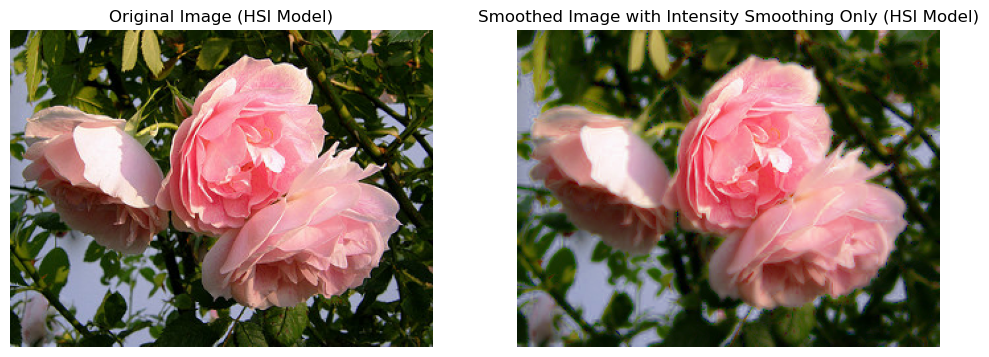


This repository demonstrates basic and advanced image smoothing techniques, 
both for grayscale and color images. By exploring both the RGB and HSI color models, 
we can perform sophisticated image processing operations such as preserving color 
information while modifying image brightness or sharpness.



In [6]:
# Image Smoothing Techniques in Image Processing
# 
# Image smoothing is a technique used in image processing to reduce noise and detail in an image. This process can
# be applied to grayscale images, color images (separate channels), and images in the HSI (Hue, Saturation, Intensity)
# color model. In this script, we demonstrate three different methods of smoothing:
#
# 1. **Grayscale Image Smoothing**: The grayscale image is smoothed by applying a filter over the pixel values.
# 2. **Color Image Smoothing**: The color image is split into individual RGB channels, which are smoothed independently.
# 3. **HSI Intensity Component Smoothing**: The image is converted to the HSI color model, where only the intensity
#    component is smoothed, leaving the color information (Hue and Saturation) intact.

# Libraries used:
# - OpenCV (cv2): For reading, processing, and displaying images.
# - NumPy (np): For creating and applying kernels for smoothing.
# - Matplotlib (plt): For visualizing images side by side.

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display two images side by side
def display_images(original, smoothed, title_original, title_smoothed):
    # Create a figure with two subplots (1 row, 2 columns)
    plt.figure(figsize=(12, 6))

    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray' if len(original.shape) == 2 else None)  # Use grayscale if image is 2D
    plt.title(title_original)  # Title for the original image
    plt.axis('off')  # Turn off axes

    # Display the smoothed image
    plt.subplot(1, 2, 2)
    plt.imshow(smoothed, cmap='gray' if len(smoothed.shape) == 2 else None)  # Use grayscale if image is 2D
    plt.title(title_smoothed)  # Title for the smoothed image
    plt.axis('off')  # Turn off axes

    plt.show()  # Show the plot

# Kernel size for smoothing filter (5x5 average kernel)
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)  # Creating a normalized kernel for smoothing

# ------------ Grayscale Image Smoothing ------------ #
# Grayscale image is typically a 2D array, where pixel values range from 0 (black) to 255 (white)
# Path to grayscale image (worldview-1.jpg should be a grayscale image)
image_path = os.path.join(os.getcwd(), 'data', 'images', 'worldview-1.jpg') 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale

# Apply the smoothing filter to the grayscale image using 2D convolution
smoothed_image_gray = cv2.filter2D(image, -1, kernel)

# Display the original and smoothed grayscale images
display_images(image, smoothed_image_gray, 'Original Grayscale Image', 'Smoothed Grayscale Image')

# ------------ Color Image Smoothing ------------ #
# Color image is typically represented as a 3D array (Height x Width x 3), where each pixel has RGB values
# Path to color image (lena_color.jpg should be a color image)
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Read a color image
image_color = cv2.imread(image_path)

# Split the color image into Blue, Green, and Red channels
B, G, R = cv2.split(image_color)

# Apply the smoothing filter independently to each channel (R, G, B)
smoothed_R = cv2.filter2D(R, -1, kernel)
smoothed_G = cv2.filter2D(G, -1, kernel)
smoothed_B = cv2.filter2D(B, -1, kernel)

# Merge the smoothed channels back together to form the smoothed color image
smoothed_image_color = cv2.merge([smoothed_B, smoothed_G, smoothed_R])

# Display the original and smoothed color images side by side using Matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title('Original Color Image')
plt.axis('off')  # Turn off axes

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(smoothed_image_color, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title('Smoothed Color Image')
plt.axis('off')  # Turn off axes

plt.show()

# ------------ Intensity Component Smoothing using HSI Model ------------ #
# The HSI model separates the color components into Hue, Saturation, and Intensity.
# Only the Intensity (I) component is smoothed here, leaving the Hue and Saturation intact.
# Path to the image (roses.jpg should be a color image)
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
image_hsi = cv2.imread(image_path)

# Convert the image to the HSV color model (Hue, Saturation, Value, where Value is the intensity)
hsv_image = cv2.cvtColor(image_hsi, cv2.COLOR_BGR2HSV)

# Extract the Hue (h), Saturation (s), and Intensity (i) channels
h, s, i = cv2.split(hsv_image)

# Apply the smoothing filter to the intensity (I) channel only
smoothed_i = cv2.filter2D(i, -1, kernel)

# Merge the smoothed intensity channel back with the original Hue and Saturation channels
smoothed_hsv_image = cv2.merge([h, s, smoothed_i])

# Convert the smoothed HSV image back to BGR format for visualization
smoothed_rgb_image = cv2.cvtColor(smoothed_hsv_image, cv2.COLOR_HSV2BGR)

# Display the original and smoothed HSI images side by side using Matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_hsi, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title('Original Image (HSI Model)')
plt.axis('off')  # Turn off axes

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(smoothed_rgb_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title('Smoothed Image with Intensity Smoothing Only (HSI Model)')
plt.axis('off')  # Turn off axes

plt.show()

# ------------ Conclusion ------------ #
# In this script, we demonstrated three different smoothing techniques:
# 1. **Grayscale Image Smoothing**: Reduced noise by applying a smoothing filter on the grayscale image.
# 2. **Color Image Smoothing**: Each RGB channel of the color image was smoothed independently.
# 3. **HSI Intensity Smoothing**: Only the intensity channel of the image was smoothed while preserving the hue and saturation.
# These methods are foundational in image processing and can be used in various applications such as image denoising, 
# detail reduction, and pre-processing for machine learning models.
print("""
This repository demonstrates basic and advanced image smoothing techniques, 
both for grayscale and color images. By exploring both the RGB and HSI color models, 
we can perform sophisticated image processing operations such as preserving color 
information while modifying image brightness or sharpness.
""")
